In [1]:
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.optimize import minimize

In [14]:
res_1d[res_1d["rate"]== max(res_1d["rate"])]['x']

47    48400
Name: x, dtype: int32

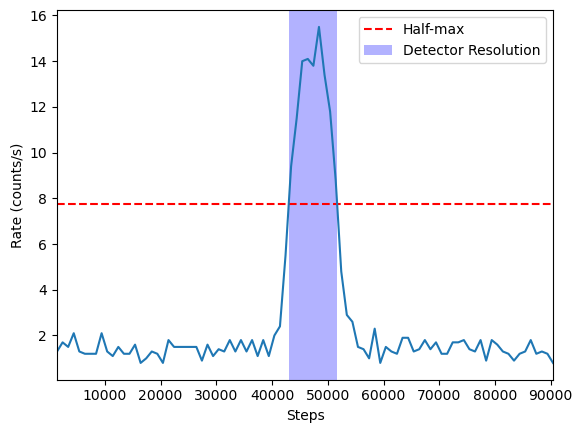

In [66]:
res_1d = np.loadtxt("Task1_Full_Scan.csv", delimiter=',',dtype = np.int32)
res_1d = pd.DataFrame(res_1d, columns = ['x','theta','t','ch1','ch2','counts'])
res_1d['rate'] = res_1d['counts']/res_1d['t']
plt.hlines(max(res_1d['rate'])/2, min(res_1d['x']), max(res_1d['x']), colors='r', linestyles='--', label="halfmax")
#plt.axvline(x=x_lower, color='red', linestyle='--', label='Vertical Line at x=3')
plt.axvspan(x_lower, x_upper, color='b', alpha=0.3, lw=0)
#plt.scatter(res_1d['x'][np.argmin(abs(val-res_1d['rate']))], res_1d['rate'][np.argmin(abs(val-res_1d['rate']))])
#plt.plot(res_1d['x'], a*res_1d['x'] + b)
plt.plot(res_1d['x'], res_1d['rate'])
plt.xlim(min(res_1d['x']), max(res_1d['x']))
plt.xlabel('Steps')
plt.ylabel('Rate (counts/s)')
plt.legend(['Half-max', 'Detector Resolution'])


In [69]:
def mins(data, value):
    diffs= abs(data-value)
    min_indices = np.argpartition(diffs, 4)[:4]

    return min_indices
print(mins(res_1d['rate'], max(res_1d['rate'])/2))

x = [res_1d['x'][41], res_1d['rate'][41]]
y = [res_1d['x'][42], res_1d['rate'][42]]

u = [res_1d['x'][50], res_1d['rate'][50]]
w = [res_1d['x'][51], res_1d['rate'][51]]

def eq(x1, y1, x2, y2):
    # Calculate the slope
    slope = (y2 - y1) / (x2 - x1)
    print(slope)
    # Calculate the y-intercept using one of the points
    intercept = y1 - slope * x1
    x_pred= ((max(res_1d['rate'])/2)-intercept)/slope
    # Return the equation in the form y = mx + b
    return x_pred

x_lower= eq(x[0], x[1], y[0], y[1])
x_upper= eq(u[0], u[1], w[0], w[1])

(x_upper-x_lower)/2 + x_lower
x[0]


[50 42 41 51]
0.0039000000000000003
-0.004000000000000001


42400

/var/folders/5d/53lzqyp57z793j3hf_bnm3k40000gn/T/ipykernel_1314/3757116551.py:8: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  file_x = np.loadtxt( "two_source/" + file_x + ".csv", delimiter=',',dtype = np.int32)
/var/folders/5d/53lzqyp57z793j3hf_bnm3k40000gn/T/ipykernel_1314/3757116551.py:9: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.

30


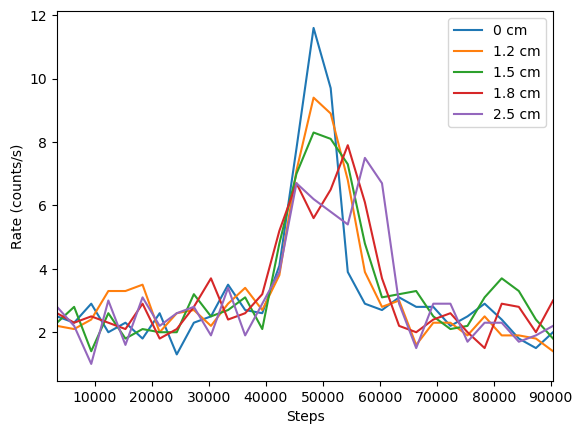

In [53]:
file_names_x= ["cd_0", "cd_1.2", "cd_1.5", "cd_1.8", "cd_2.5"]
file_names_y= ["cd_y_0", "cd_y_1.2", "cd_y_1.5", "cd_y_1.8", "cd_y_2.5"]
for file_x, file_y in zip(file_names_x, file_names_y):
    if file_y == 'cd_y_1.5':
        file_y = np.flip(np.loadtxt( "two_source/" + file_y + ".csv", delimiter=',',dtype = np.int32))
        file_x = np.loadtxt( "two_source/" + file_x + ".csv", delimiter=',',dtype = np.int32)
    else:
        file_x = np.loadtxt( "two_source/" + file_x + ".csv", delimiter=',',dtype = np.int32)
        file_y = np.loadtxt( "two_source/" + file_y + ".csv", delimiter=',',dtype = np.int32)
    plt.plot(file_x, file_y/10)
plt.xlim(min(file_x), max(file_x))
plt.xlabel('Steps')
plt.legend(["0 cm", '1.2 cm', '1.5 cm', '1.8 cm', '2.5 cm'])
plt.ylabel('Rate (counts/s)')
print(len(file_x))

In [32]:
import shapely.geometry as SG

line = SG.LineString(list(zip(res_1d['x'],res_1d['rate'])))
yline = SG.LineString([(min(res_1d['rate']), val), (max(res_1d['rate']), val)])
coords = np.array(line.intersection(yline))
print(coords)

LINESTRING Z EMPTY


In [ ]:
#two source scan
